In [1]:

%matplotlib inline

import pandas as pd
import stumpy


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
import stumpy
from stumpy import config

config.STUMPY_EXCL_ZONE_DENOM = 1  # The exclusion zone is i ± m/config.STUMPY_EXCL_ZONE_DENOM

# Matrix profile analysis of delta 18  proxy record

## Data

In [3]:
d18=pd.read_csv("d18.txt",header=None,sep=" ")
dat_df = pd.DataFrame({'T': d18.iloc[:,1].values})

#dat_df.head()

## Matrix profile - delta18O series 

In [4]:
m=125

mp = stumpy.stump(dat_df['T'], m=m)

# index of matrix profile minimum
mp[:, 0].argmin()

3044

In [5]:
# minimum distance between subsequences
D=np.min(mp[:,0])
D

2.340599884422878

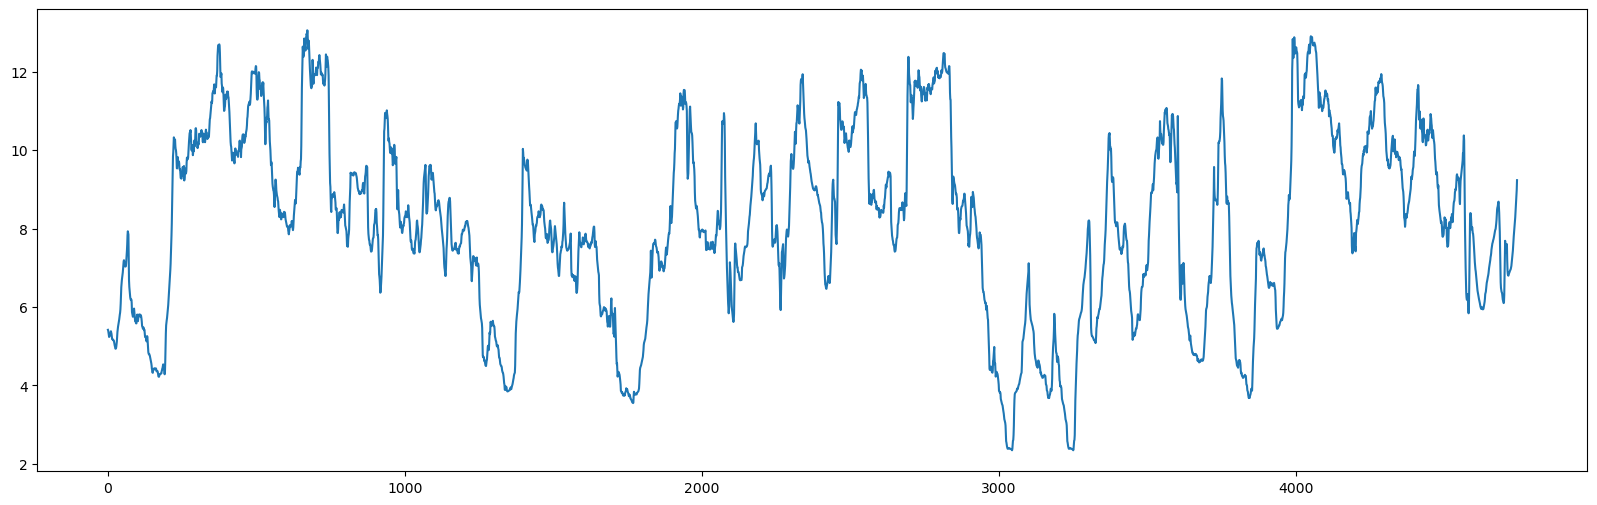

In [6]:
plt.plot(mp[:,0])
#plt.axhline(y=D*2, color='g', linestyle='--')
#plt.axhline(y=D*3, color='b', linestyle='--')

## Motifs extraction - Top motif

**Default parameters**

In [7]:
stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=None, cutoff=None, max_matches=10, max_motifs=3, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)


(array([[0.        , 2.34059988, 3.83427921, 3.94534017, 4.44821842,
         4.81099203, 5.34706922, 6.42778619, 6.50522425, 6.90341135]]),
 array([[3044, 3250, 1771, 1340,  161, 3666,   11, 3930, 4629, 2134]]))

**R=2**

In [8]:
stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=D*2, cutoff=None, max_matches=10, max_motifs=3, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)

(array([[0.        , 2.34059988, 3.83427921, 3.94534017, 4.44821842]]),
 array([[3044, 3250, 1771, 1340,  161]]))

**R=3**

In [9]:
stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=D*3, cutoff=None, max_matches=10, max_motifs=3, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)

(array([[0.        , 2.34059988, 3.83427921, 3.94534017, 4.44821842,
         4.81099203, 5.34706922, 6.42778619, 6.50522425, 6.90341135]]),
 array([[3044, 3250, 1771, 1340,  161, 3666,   11, 3930, 4629, 2134]]))

**Unconstrained distance**

In [10]:
stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=np.inf, cutoff=None, max_matches=10, max_motifs=3, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)

(array([[0.        , 2.34059988, 3.83427921, 3.94534017, 4.44821842,
         4.81099203, 5.34706922, 6.42778619, 6.50522425, 6.90341135]]),
 array([[3044, 3250, 1771, 1340,  161, 3666,   11, 3930, 4629, 2134]]))

**Unconstrained distance and cutoff**

In [11]:
stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=np.inf, cutoff=np.inf, max_matches=10, max_motifs=3, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)

(array([[0.        , 2.34059988, 3.83427921, 3.94534017, 4.44821842,
         4.81099203, 5.34706922, 6.42778619, 6.50522425, 6.90341135],
        [0.        , 4.4688338 , 6.0726389 , 6.49523906, 6.51635682,
         6.66631504, 7.10963223, 7.60607312, 7.93960963, 8.06431106],
        [0.        , 5.92053219, 7.20932433, 7.49430585, 7.63786257,
         8.12951918, 9.08503701, 9.14156643, 9.25648841, 9.3704437 ]]),
 array([[3044, 3250, 1771, 1340,  161, 3666,   11, 3930, 4629, 2134],
        [3804, 3129, 1262, 3311, 2967, 1702, 3460, 1834,   83, 4700],
        [2265, 2958, 1250, 3438, 1646, 4702, 3143, 4187, 3807, 4484]]))

In [12]:
mtf_out=stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=D*3, cutoff=None, max_matches=10, max_motifs=3, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)
mtf_out

(array([[0.        , 2.34059988, 3.83427921, 3.94534017, 4.44821842,
         4.81099203, 5.34706922, 6.42778619, 6.50522425, 6.90341135]]),
 array([[3044, 3250, 1771, 1340,  161, 3666,   11, 3930, 4629, 2134]]))

In [13]:
mp[3043:3049]

array([[2.366624950007765, 3249, 1770, 3249],
       [2.340599884422878, 3250, 1771, 3250],
       [2.382338935572625, 3251, 1772, 3251],
       [2.500417246984364, 3252, 1773, 3252],
       [2.5865821477410536, 3253, 1774, 3253],
       [2.601197727003681, 3254, 1775, 3254]], dtype=object)

In [13]:
mp[mtf_out[1] ]

array([[[2.340599884422878, 3250, 1771, 3250],
        [2.340599884422878, 3044, 3044, 3666],
        [3.8342792143971747, 3044, 1339, 3044],
        [3.9453401738356195, 3044, 164, 3044],
        [4.432213889514652, 3249, 10, 3249],
        [4.755650679689638, 3250, 3250, 4630],
        [5.347069221708577, 3044, -1, 3044],
        [6.427786186990729, 3044, 3044, 4629],
        [5.937727129600607, 3665, 3665, -1],
        [6.761796687922602, 1767, 1767, 3044]]], dtype=object)

In [14]:
# write matrix profile to extrenal csv file
pd.DataFrame(mp[:, ]).to_csv("mp_d18.csv", sep=",", index=False)

In [15]:
# write motifs to external csv file
pd.concat([pd.DataFrame(mtf_out[0]).transpose(),pd.DataFrame(mtf_out[1]).transpose()],axis=1).to_csv("mtf_d18.csv", sep=",", index=False)

## Different window sizes

**Window size = 3000 years**

In [16]:

m=int(3000/20)

mp = stumpy.stump(dat_df['T'], m=m)

# index of matrix profile minimum
mp[:, 0].argmin()


3023

In [17]:
# write matrix profile to extrenal csv file
pd.DataFrame(mp[:, ]).to_csv("mp_d18_m_3000.csv", sep=",", index=False)

In [18]:
mtf_out=stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=D*3, cutoff=None, max_matches=10, max_motifs=1, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)
mtf_out

(array([[0.        , 3.16237161, 4.23622006, 4.90669163, 4.96920423,
         5.72720146]]),
 array([[3023, 3229, 1750, 1318,  140, 3646]]))

In [19]:
# write motifs to external csv file
pd.concat([pd.DataFrame(mtf_out[0]).transpose(),pd.DataFrame(mtf_out[1]).transpose()],axis=1).to_csv("mtf_d18_m_3000.csv", sep=",", index=False)

**Window size = 3500 years**

In [20]:
m=int(3500/20)

mp = stumpy.stump(dat_df['T'], m=m)

# index of matrix profile minimum
mp[:, 0].argmin()


2998

In [21]:
# write matrix profile to extrenal csv file
pd.DataFrame(mp[:, ]).to_csv("mp_d18_m_3500.csv", sep=",", index=False)

In [22]:
mtf_out=stumpy.motifs(dat_df['T'],mp[:, 0], min_neighbors=1, max_distance=D*3, cutoff=None, max_matches=10, max_motifs=3, atol=1e-08, normalize=True, p=2.0, T_subseq_isconstant=None)
mtf_out

(array([[0.        , 4.13722046, 4.90126854, 5.67021801, 6.00721833],
        [0.        , 4.44854653,        nan,        nan,        nan]]),
 array([[2998, 3204, 1725,  116, 1293],
        [3802, 3127,   -1,   -1,   -1]]))

In [23]:
# write motifs to external csv file
pd.concat([pd.DataFrame(mtf_out[0]).transpose(),pd.DataFrame(mtf_out[1]).transpose()],axis=1).to_csv("mtf_d18_m_3500.csv", sep=",", index=False)